# Урок 3. Логистическая регрессия. Log Loss

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-1">Логистическая регрессия</a></span></li><li><span><a href="#Логистическая-функция-потерь" data-toc-modified-id="Логистическая-функция-потерь-2">Логистическая функция потерь</a></span></li><li><span><a href="#Пример" data-toc-modified-id="Пример-3">Пример</a></span></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

### Логистическая регрессия

<img src='img/algorithmes-de-classification-regression-logistique-9.jpg' width=400 align='left'> </img>

$\vec{y}=X\vec{w}$

Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:   

-1, -0.2, 1.3, 0.05 ...

p = [0, 1] - вероятность

$odds = \frac{p}{1 - p} = \frac{p_1}{p_0}$ - шансы

In [3]:
0.5 / (1 - 0.5)

1.0

In [4]:
0.01 / (1 - 0.01)

0.010101010101010102

In [5]:
0.99 / (1 - 0.99)

98.99999999999991

In [6]:
p = 1e-10
np.log(p / (1 - p))                       

-23.025850929840455

In [7]:
p = 0.99
np.log(p / (1 - p))

4.595119850134589

$$X\vec{w} = \ln\Big(\frac{\vec{p}}{1 - \vec{p}}\Big)$$
$$\exp(X\vec{w}) = \frac{\vec{p}}{1 - \vec{p}}$$
$$(1-\vec{p})\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})-\vec{p}\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})=\vec{p}(1+\exp(X\vec{w}))$$
$$\vec{p}=\frac{\exp{(X\vec{w})}}{1+\exp{(X\vec{w})}}$$
$$\vec{p}=\frac{1}{1+\exp{(-X\vec{w})}}$$

In [8]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

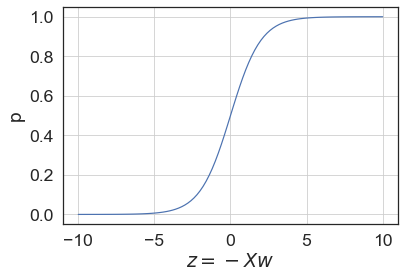

In [9]:
# сигмоида
z = np.linspace(-10, 10, 101)
probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.xlabel('$z=-Xw$')
plt.ylabel('p')
plt.grid();

### Логистическая функция потерь 

$$Logloss=-y \ln(p) - (1-y)\ln(1-p)$$

$y=0/1$ - истинный класс   
$p=[0,1]$ - ответ алгоритма

In [10]:
def calc_logloss(y, y_pred):
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [11]:
# Пример применения
y_true = 1
y_pred = 0.99
calc_logloss(y_true, y_pred)

0.01005033585350145

### Пример

In [12]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [13]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[:, 2] = standard_scaler(X[:, 2])
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [14]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [15]:
w = eval_LR_model(X_st, y, iterations=1000, alpha=1e-2) 

100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453087
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099053
300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587
400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013
500 [-0.0701621  -0.68661758  0.94984062  1.24404686] 0.541676599615156
600 [-0.1239972  -0.69202069  0.98318257  1.26924759] 0.536984186497779
700 [-0.17239277 -0.69933957  1.00953865  1.29824779] 0.5330427663756571
800 [-0.21681092 -0.7078635   1.03062761  1.32973537] 0.52955515035808
900 [-0.25830834 -0.71709934  1.04769231  1.36276535] 0.5263621224044184
1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747


### Домашние задания

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - np.clip).  
2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred).
5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.
6. Могла ли модель переобучиться? Почему?
7. *Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

Методичка https://colab.research.google.com/drive/1DxLcLdf2Lns12qOqGVvapDha5tiltM1f?usp=sharing

## Task №1

In [17]:
def calc_logloss(y, y_pred):
    y_pred = np.clip(y_pred, 0.00000001, 0.99999999)
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [21]:
y_true = 1
y_pred = 0
calc_logloss(y_true, y_pred)

18.420680743952367

In [22]:
y_true = 1
y_pred = 1
calc_logloss(y_true, y_pred)

1.0000000100247594e-08

## Task №2

In [81]:
w = eval_LR_model(X_st, y, iterations=100000, alpha=0.999) 

10000 [-35.89232465  -3.59417534  -9.64610814  29.40526785] 0.11667708449584739
20000 [-47.82526582  -4.60877202 -13.07819204  38.91592723] 0.09157779583988204
30000 [-56.18652116  -5.26676484 -15.51456029  45.45802423] 0.07959187609074667
40000 [-63.03517574  -5.76461815 -17.5404797   50.73154979] 0.07165983048586289
50000 [-69.03078516  -6.17353416 -19.33423099  55.29472865] 0.06563152648867011
60000 [-74.45673018  -6.52790218 -20.96921183  59.39368857] 0.060719078030607845
70000 [-79.45773263  -6.84595163 -22.48243032  63.15498525] 0.056558025974123724
80000 [-84.1181832   -7.13778567 -23.89589591  66.65128052] 0.052950342218297176
90000 [-88.49288485  -7.40931053 -25.22440603  69.92848003] 0.04977449103532172
100000 [-92.6205763   -7.66422221 -26.47878316  73.01811229] 0.04694868883943409


## Task №3

In [82]:
def calc_pred_proba(X, w):
    return sigmoid(standard_scaler(-X @ w))

In [83]:
y_pred_proba = calc_pred_proba(X, w)
y_pred_proba

array([0.27309804, 0.36227823, 0.38527341, 0.31599795, 0.72721199,
       0.41111634, 0.7463779 , 0.89245402, 0.25306562, 0.5124011 ])

## Task №4

In [84]:
def calc_pred(X, w):
    return np.array([1 if p > 0.5 else 0 for p in calc_pred_proba(X, w)])

In [85]:
y_pred = calc_pred(X, w)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

## Task №5

In [86]:
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [90]:
accuracy = np.mean(y_pred == y)
accuracy

0.7

In [111]:
def confusion_matrix(y, y_pred):
    return np.array([[np.sum((y_pred == True) & (y_pred == y)), np.sum((y_pred == True) & (y_pred != y))],
    [np.sum((y_pred == False) & (y_pred != y)), np.sum((y_pred == False) & (y_pred == y))]])

In [114]:
cm = confusion_matrix(y, y_pred)
cm

array([[3, 1],
       [2, 4]])

In [115]:
precision = cm[0,0] / np.sum(cm[0,:])
precision

0.75

In [116]:
recall = cm[0,0] / np.sum(cm[:,0])
recall

0.6

In [117]:
def f_score(beta, precision, recall):
    return (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

In [118]:
f_score(1, precision, recall)

0.6666666666666665

## Task №6

Модель могла переобучиться, так как в основе алгоритма лежит принцип минимизации потерь без регуляризации